# <center>Predict Loan Eligibility for Dream Housing Finance company</center>

![image](https://datahack-prod.s3.ap-south-1.amazonaws.com/__sized__/contest_cover/loanpre-thumbnail-1200x1200.png)

# <center> Problem Statement</center>

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

In [1]:
import pandas as pd

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

# for interactivity
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

from sklearn.metrics import classification_report

import warnings

import ppscore as pps

import missingno as mno

warnings.filterwarnings("ignore")

In C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The sav

In [2]:
train = pd.read_csv("train.csv")

In [3]:
print("Train data shape : ",train.shape)

Train data shape :  (614, 13)


In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
train["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [9]:
train["Loan_Status"] = train["Loan_Status"].replace("Y" , 1)
train["Loan_Status"] = train["Loan_Status"].replace("N" , 0)

<AxesSubplot:ylabel='Loan_Status'>

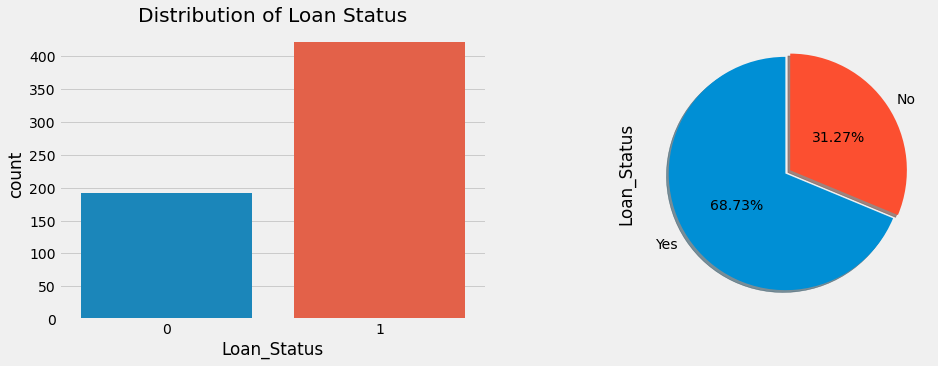

In [10]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
sns.countplot(train['Loan_Status'],)
plt.title("Distribution of Loan Status")


plt.subplot(1, 2, 2)
train['Loan_Status'].value_counts().plot(kind = 'pie', explode = [0, 0.05], autopct = '%.2f%%', startangle = 90,
                                       labels = ['Yes','No'], shadow = True, pctdistance = 0.5)

# Missing Value

<center>Treatment of Training Data Missing Values</center>

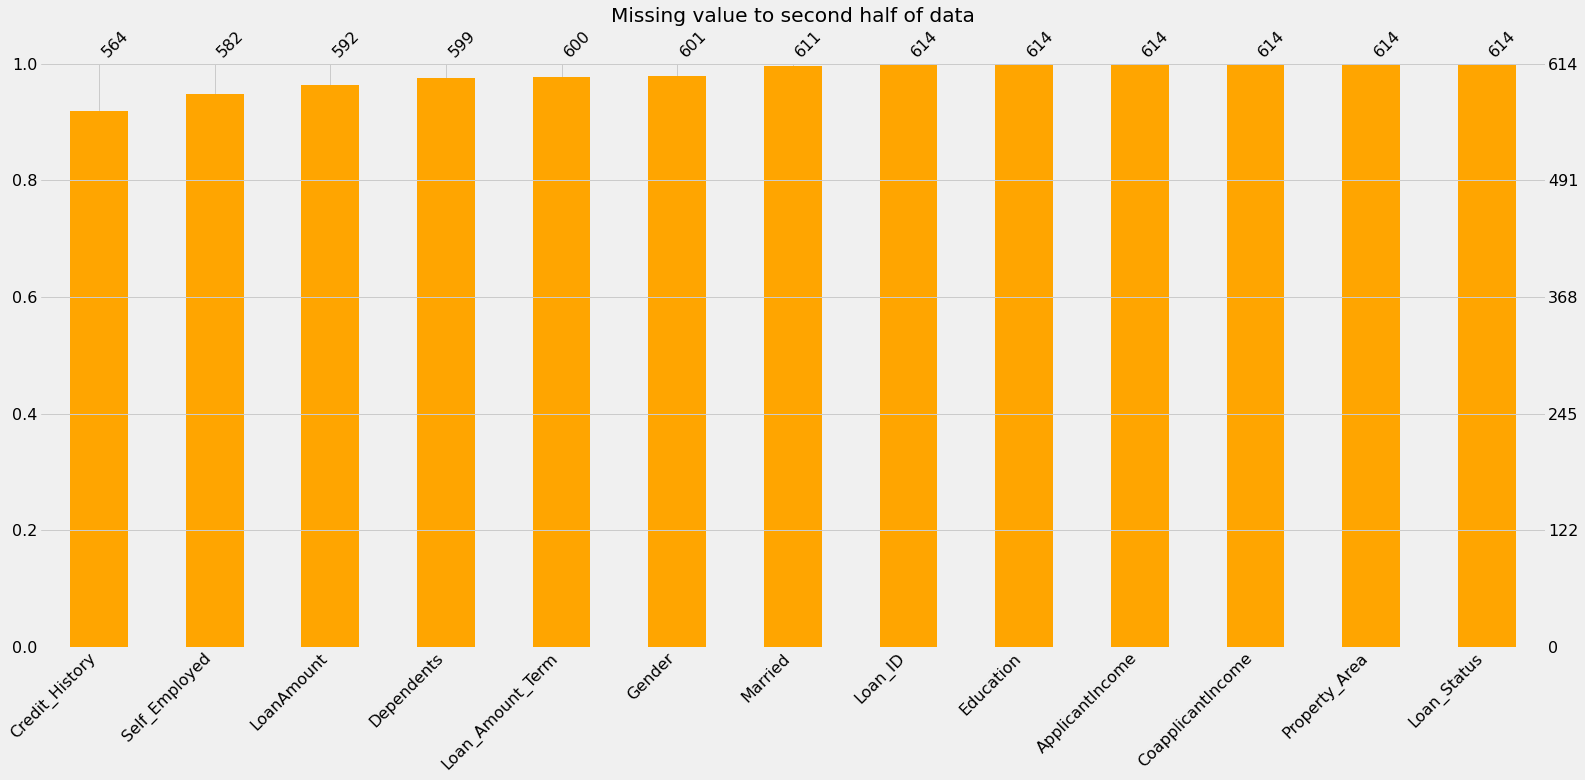

In [11]:

mno.bar(train,
        color= "orange",
        sort="ascending"
       )
plt.title("Missing value to second half of data")
plt.show()

In [12]:
train["Gender"].fillna(train["Gender"].mode()[0], inplace=True)
train["Married"].fillna(train["Married"].mode()[0], inplace=True)
train["Dependents"].fillna(train["Dependents"].mode()[0], inplace=True)
train["Self_Employed"].fillna(train["Self_Employed"].mode()[0], inplace=True)
train["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].mode()[0], inplace=True)
train["Credit_History"].fillna(train["Credit_History"].mode()[0], inplace=True)
train["LoanAmount"].fillna(train["LoanAmount"].median(), inplace=True)

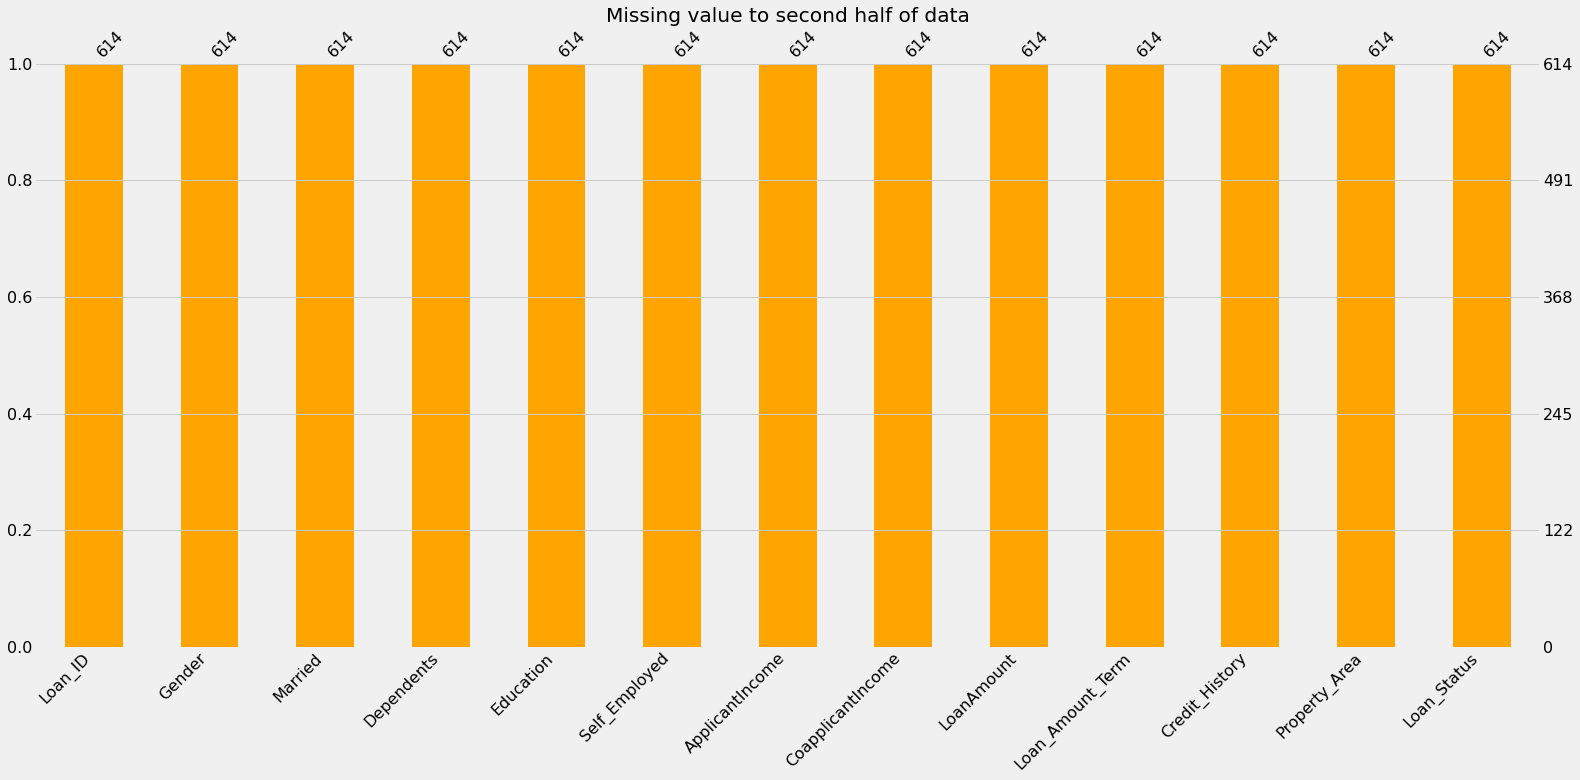

In [13]:
mno.bar(train,
        color= "orange",
        sort="ascending"
       )
plt.title("Missing value to second half of data")
plt.show()

In [14]:
train.isnull().sum().sum()

0

# Data Visualization

## <center>Univariate Analysis</center>

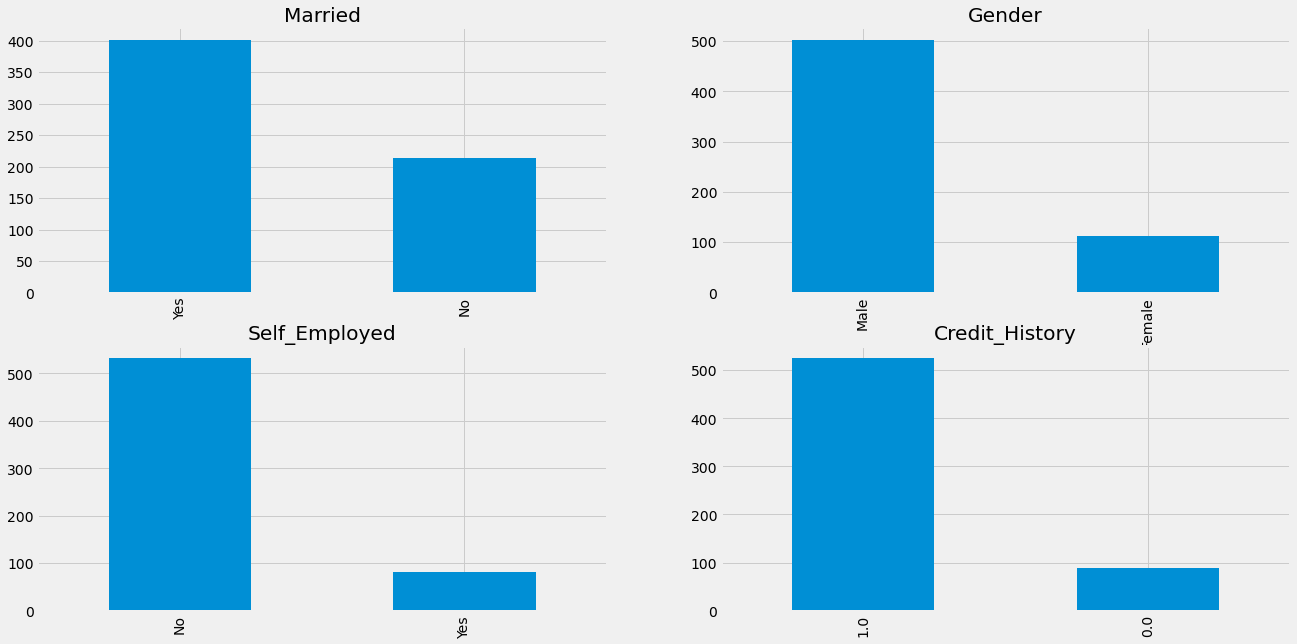

In [15]:

plt.subplot(2,2,1)
train["Married"].value_counts().plot.bar(figsize=(20,10))
plt.title("Married")

plt.subplot(2,2,2)
train["Gender"].value_counts().plot.bar()
plt.title("Gender")

plt.subplot(2,2,3)
train["Self_Employed"].value_counts().plot.bar()
plt.title("Self_Employed")

plt.subplot(2,2,4)
train["Credit_History"].value_counts().plot.bar()
plt.title("Credit_History")

plt.show()

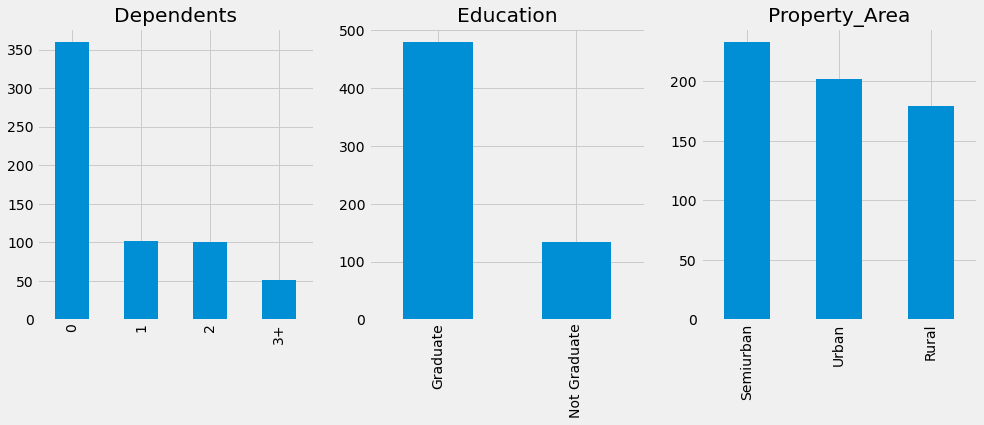

In [16]:
plt.subplot(1,3,1)
train["Dependents"].value_counts().plot.bar()
plt.title("Dependents")

plt.subplot(1,3,2)
train["Education"].value_counts().plot.bar()
plt.title("Education")

plt.subplot(1,3,3)
train["Property_Area"].value_counts().plot.bar()
plt.title("Property_Area")



plt.show()

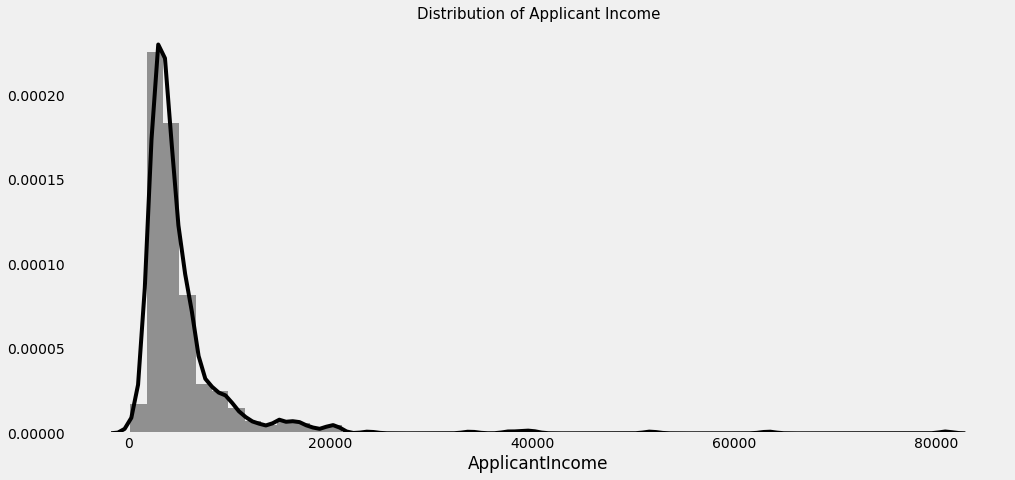

In [17]:
plt.rcParams["figure.figsize"] =(15,7)
sns.distplot(train["ApplicantIncome"], color="black")
plt.title("Distribution of Applicant Income", fontsize=15)
plt.grid()
plt.show()

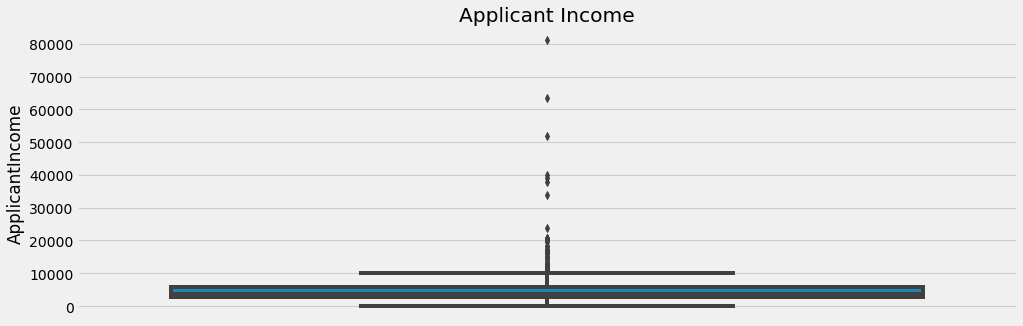

In [18]:
plt.rcParams["figure.figsize"] =(15,5)
sns.boxplot(y =train["ApplicantIncome"])
plt.title("Applicant Income")
plt.show()

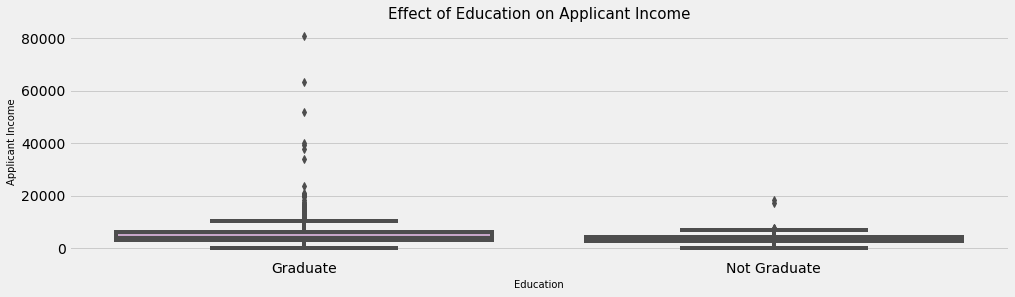

In [19]:
plt.rcParams['figure.figsize'] = (15,4)
sns.boxplot(train['Education'], train['ApplicantIncome'], palette = 'PuRd')
plt.title('Effect of Education on Applicant Income', fontsize = 15)
plt.xlabel('Education', fontsize = 10)
plt.ylabel('Applicant Income', fontsize = 10)
plt.show()

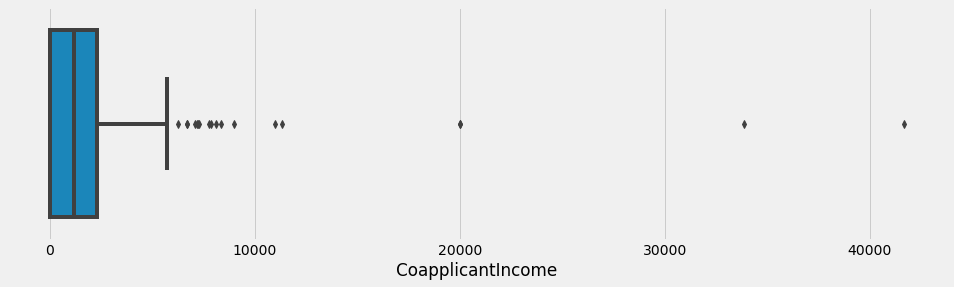

In [20]:
sns.boxplot(train["CoapplicantIncome"])
plt.show()

## <center>Bivariate Analysis</center>

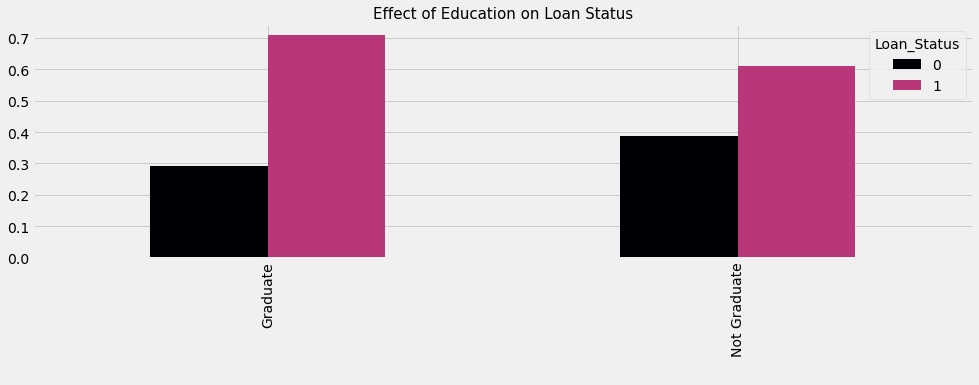

In [21]:
plt.rcParams['figure.figsize'] = (15,4)
x = pd.crosstab(train['Education'], train['Loan_Status'])
colors = plt.cm.magma(np.linspace(0, 1, 3))
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = False, color = colors)
plt.title('Effect of Education on Loan Status', fontsize = 15)
plt.xlabel(' ')
plt.show()

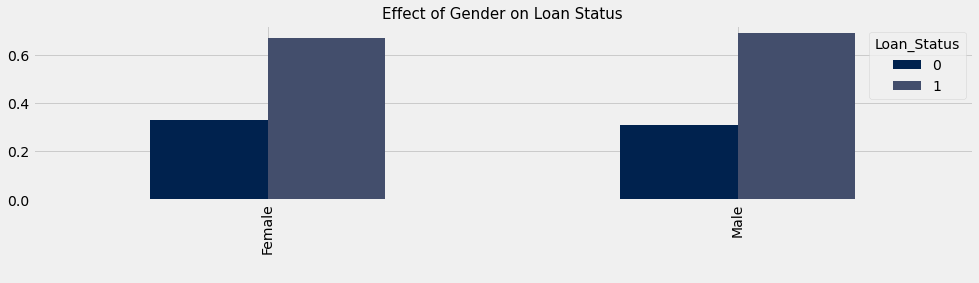

In [22]:
plt.rcParams['figure.figsize'] = (15, 3)
x = pd.crosstab(train['Gender'], train['Loan_Status'])
colors = plt.cm.cividis(np.linspace(0, 1, 5))
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = False, color = colors)
plt.title('Effect of Gender on Loan Status', fontsize = 15)
plt.xlabel(' ')
plt.show()

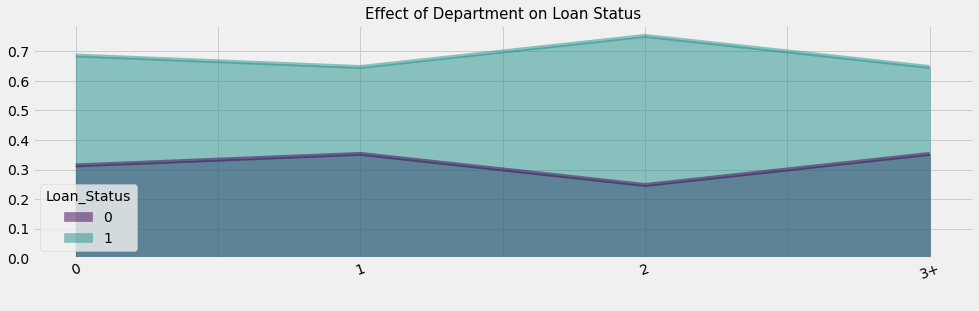

In [23]:
plt.rcParams['figure.figsize'] = (15,4)
x = pd.crosstab(train['Dependents'], train['Loan_Status'])
colors = plt.cm.viridis(np.linspace(0, 1, 3))
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'area', stacked = False, color = colors)
plt.title('Effect of Department on Loan Status', fontsize = 15)
plt.xticks(rotation = 20)
plt.xlabel(' ')
plt.show()

In [24]:
plt.rcParams['figure.figsize'] = (15, 4)
@interact_manual
def bivariate_plot(column1 = list(train.select_dtypes('object').columns),
                   column2 = list(train.select_dtypes('number').columns[1:])):
    sns.barplot(train[column1], train[column2])

interactive(children=(Dropdown(description='column1', options=('Loan_ID', 'Gender', 'Married', 'Dependents', '…

## <center>Multivariate Analysis</Center>
Multivariate analysis is based on the principles of multivariate statistics, which involves observation and analysis of more than one statistical outcome variable at a time.

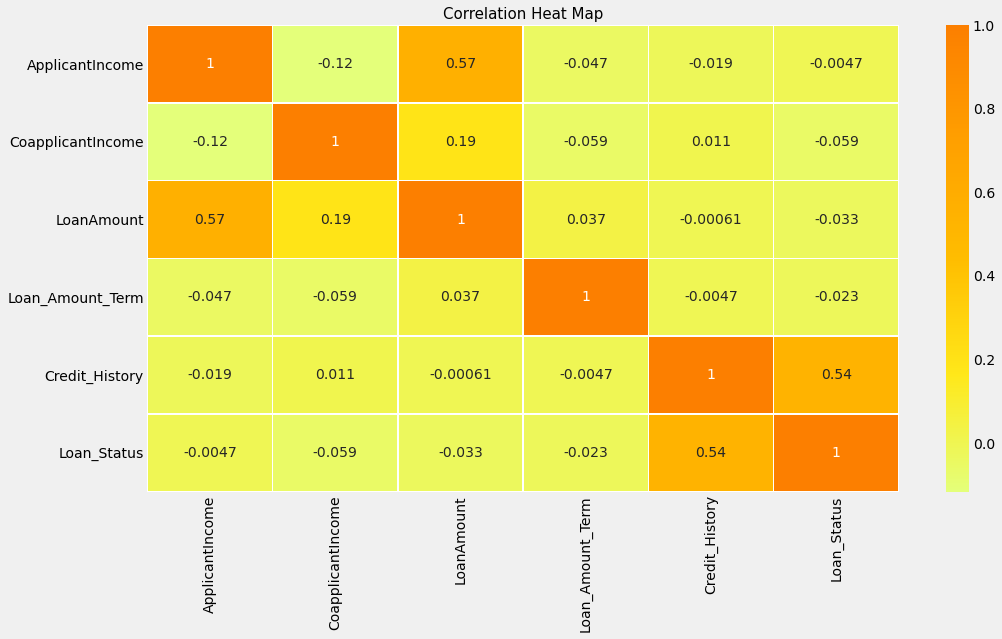

In [25]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(train.corr(), annot = True, linewidth = 0.5, cmap = 'Wistia')
plt.title('Correlation Heat Map', fontsize = 15)
plt.show()

# Outlier Treatment

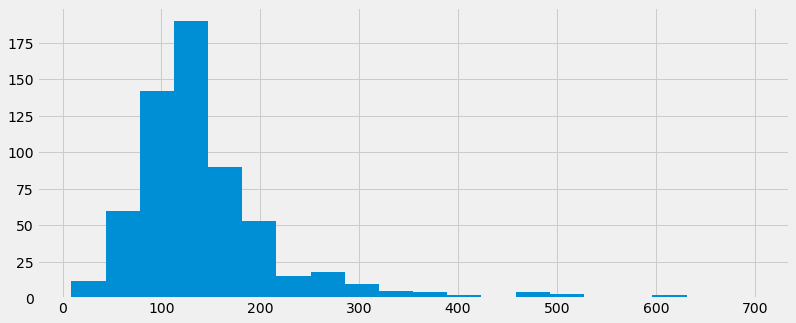

In [26]:
plt.rcParams["figure.figsize"] = (12,5)
train["LoanAmount"].hist(bins=20),
plt.show()

In [27]:
train["LoanAmount_log"] = np.log(train["LoanAmount"])

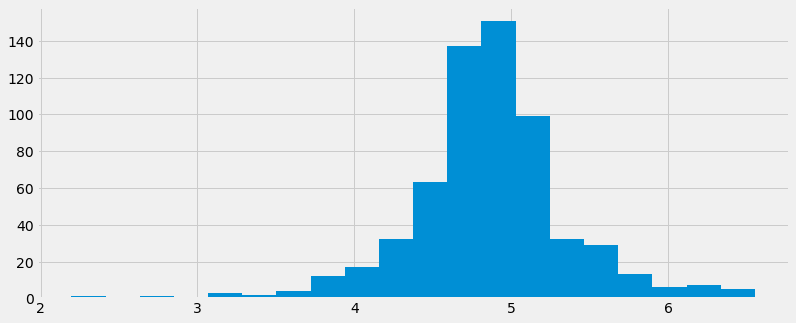

In [28]:
train["LoanAmount_log"].hist(bins=20)
plt.show()

In [29]:
train["total_income"] = train["ApplicantIncome"] + train["CoapplicantIncome"]

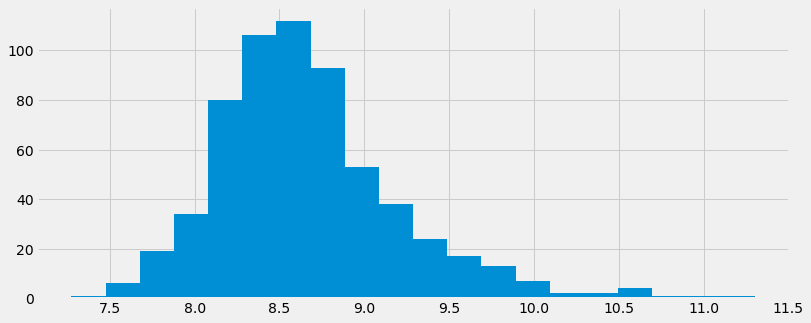

In [30]:
np.log(train["total_income"]).hist(bins=20)
plt.show()

In [31]:
train["total_income"] = np.log(train.total_income)

# Model Building

In [32]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log', 'total_income'],
      dtype='object')

In [33]:
x_label = ['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

y_label = ["Loan_Status"]

In [34]:
train = train.drop(x_label,1)

In [35]:
x = train.drop("Loan_Status",1)
y = train.Loan_Status

In [36]:
print(x.shape)
print(y.shape)

(614, 10)
(614,)


In [37]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,total_income
0,Male,No,0,Graduate,No,360.0,1.0,Urban,4.852030,8.674026
1,Male,Yes,1,Graduate,No,360.0,1.0,Rural,4.852030,8.714568
2,Male,Yes,0,Graduate,Yes,360.0,1.0,Urban,4.189655,8.006368
3,Male,Yes,0,Not Graduate,No,360.0,1.0,Urban,4.787492,8.505323
4,Male,No,0,Graduate,No,360.0,1.0,Urban,4.948760,8.699515


In [38]:
x = pd.get_dummies(x)

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,stratify =y, random_state=0, shuffle=True)

In [40]:
y_test.value_counts(normalize=True)

1    0.686486
0    0.313514
Name: Loan_Status, dtype: float64

In [41]:
y_train.value_counts(normalize=True)

1    0.687646
0    0.312354
Name: Loan_Status, dtype: float64

In [42]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(429, 19)
(185, 19)
(429,)
(185,)


In [43]:
def fit_score_clf(clf, X_train, y_train, X_test, y_test, name='clf'):
    """
    fits a classifer from sklearn and returns a dataframe
    clf(sklearn): classifier
    X_train(numpy): train features
    y_train(numpy): predictions row vector
    X_test(numpy): test features
    y_test(numpy): ground truth row vector
    name(string): name of classifier
    
    """
    #fit to train data
    clf.fit(X_train, y_train)
    #make predictions
    y_pred = clf.predict(X_test)
    #make dataframe from report
    clf_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
    #add clf name as column
    clf_report['clf'] = name
    
    return clf_report

In [44]:
def modify_prc_dict(clf, y_test, X_test, name ,dict_modify):
    """
    modifies a dictionary in place and adds keys for precision recall metrics
    """
    
    precision, recall, thresholds = precision_recall_curve(y_test,
                                     clf.predict_proba(X_test)[:,1],
                                     pos_label=1)
    
    clf_prc_dict = {'precision':precision, 'recall': recall, 'thresholds': thresholds}
    
    dict_modify[name] = clf_prc_dict

###  Logistic Regression

In [45]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [46]:
lr.score(x_train, y_train)

0.8018648018648019

In [47]:
lr.score(x_test, y_test)

0.827027027027027

### Support Vector Classifiers

In [48]:
from sklearn.svm import SVC
svc = SVC(kernel="linear")

In [49]:
svc.fit(x_train, y_train)

SVC(kernel='linear')

In [50]:
svc.score(x_train, y_train)

0.8018648018648019

In [51]:
svc.score(x_test, y_test)

0.827027027027027

## XGboost

In [52]:
from sklearn.ensemble import GradientBoostingClassifier

In [53]:
gbc = GradientBoostingClassifier(loss="exponential" ,random_state=0, )

In [54]:
gbc.fit(x_train, y_train)

GradientBoostingClassifier(loss='exponential', random_state=0)

In [55]:
gbc.score(x_train, y_train)

0.8857808857808858

In [56]:
gbc.score(x_test, y_test)

0.8162162162162162

## Desision Tree

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
dtc =  DecisionTreeClassifier()

In [59]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [60]:
dtc.score(x_train, y_train)

1.0

In [61]:
dtc.score(x_test, y_test)

0.745945945945946

In [62]:
dtc = DecisionTreeClassifier(min_samples_split=20, max_depth=3 )

In [63]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=20)

In [64]:
dtc.score(x_train, y_train)

0.8135198135198135

In [65]:
dtc.score(x_test, y_test)

0.8324324324324325

## Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rfc = RandomForestClassifier()

In [68]:
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [69]:
rfc.score(x_train, y_train)

1.0

In [70]:
rfc.score(x_test, y_test)

0.8054054054054054

In [71]:
rfc = RandomForestClassifier(n_estimators=200, min_samples_split=20, max_depth=3 )

In [72]:
rfc.fit(x_train, y_train)
rfc.score(x_train, y_train)

0.8018648018648019

In [73]:
rfc.score(x_test, y_test)

0.8162162162162162

## KNeighborsClassifier

In [74]:
from sklearn.neighbors import KNeighborsClassifier

In [75]:
knc = KNeighborsClassifier(n_neighbors=15)

In [76]:
knc.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [77]:
knc.score(x_train, y_train)

0.7226107226107226

In [78]:
knc.score(x_test, y_test)

0.7243243243243244